In [ ]:
!pip install kaggle >> /dev/null

In [ ]:
!kaggle datasets download -d agrigorev/clothing-dataset-full

In [ ]:
from fastcore.xtras import Path
zip_path = Path("../clothing-dataset-full.zip")
zip_path.exists()

True

In [ ]:
import zipfile
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("../data")

In [ ]:
data_path = Path("../data")
data_path.ls()

(#3) [Path('../data/images_original'),Path('../data/images.csv'),Path('../data/images_compressed')]

In [ ]:
from fastai.vision.all import *

In [ ]:
(data_path/"images_compressed").ls()[:3]

(#3) [Path('../data/images_compressed/2cd28b7c-b772-4dfa-9336-d08b14e41444.jpg'),Path('../data/images_compressed/01d1fed7-996d-496b-b3ae-73ab724f29cc.jpg'),Path('../data/images_compressed/10dd86f3-6525-49bc-9c28-e3e9b7a29b64.jpg')]

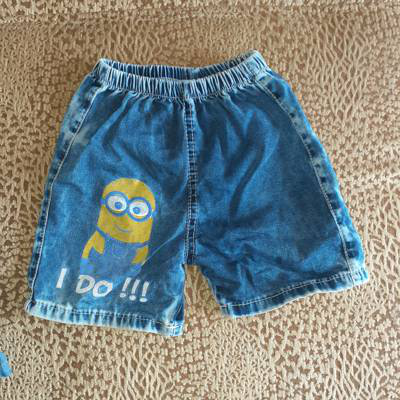

In [ ]:
im_path = (data_path/"images_compressed").ls()[0]
im = Image.open(im_path)
im

In [ ]:
im.shape

(400, 400)

In [ ]:
im_path = (data_path/"images_original").ls()[0]
im = Image.open(im_path);

In [ ]:
im.shape

(3088, 3088)

In [ ]:
bad_imgs = []
for im in (data_path/"images_compressed").ls():
    try:
        _ = Image.open(im)
    except:
        bad_imgs.append(im)
        im.unlink()

In [ ]:
len(bad_imgs)

6

In [ ]:
df = pd.read_csv(data_path/'images.csv')
df.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [ ]:
len(df[df["label"] == "Not sure"]), len(df)

(228, 5403)

In [ ]:
len(df[~(df["label"] == "Not sure")])

5175

In [ ]:
clean_df = df[~(df["label"] == "Not sure")]
clean_df.head()

,image,sender_id,label,kids
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False
5,5d3a1404-697f-479f-9090-c1ecd0413d27,138,Shorts,False
6,b0c03127-9dfb-4573-8934-1958396937bf,138,Shirt,False


In [ ]:
for img in bad_imgs:
    clean_df = clean_df[clean_df["image"] != img.stem]

In [ ]:
len(clean_df)

5170

In [ ]:
clean_df["label"].unique(), len(clean_df["label"].unique())

(array(['T-Shirt', 'Shoes', 'Shorts', 'Shirt', 'Pants', 'Skirt', 'Other',
        'Top', 'Outwear', 'Dress', 'Body', 'Longsleeve', 'Undershirt',
        'Hat', 'Polo', 'Blouse', 'Hoodie', 'Skip', 'Blazer'], dtype=object),
 19)

In [ ]:
blocks = (ImageBlock, CategoryBlock)

In [ ]:
get_x = ColReader("image", pref=(data_path/"images_compressed"), suff=".jpg")
get_y = ColReader("label")

In [ ]:
item_tfms = [Resize(224)]
batch_tfms = [*aug_transforms(), Normalize.from_stats(*imagenet_stats)]

In [ ]:
dblock = DataBlock(
    blocks=blocks,
    get_x=get_x,
    get_y=get_y,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

In [ ]:
dls = dblock.dataloaders(clean_df)

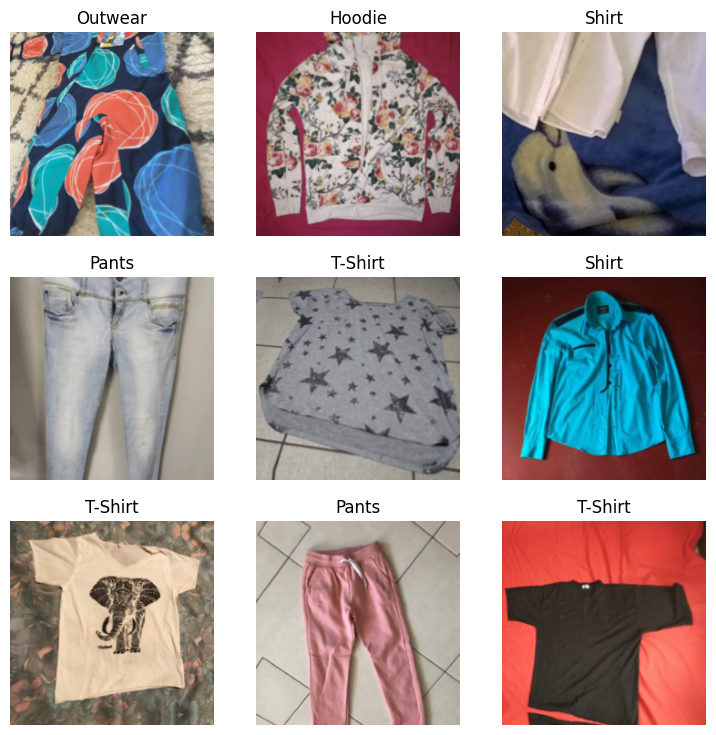

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.414496,1.025276,0.713733,00:20


epoch,train_loss,valid_loss,accuracy,time
0,1.154287,0.706250,0.796905,00:26
1,0.829337,0.676548,0.812379,00:25
2,0.595276,0.636301,0.825919,00:25
3,0.399195,0.584930,0.841393,00:25
4,0.297942,0.586610,0.847195,00:25
